In [1]:
%run style_and_packages.ipynb

# Beispiel: Einfacher Balken mit konstanter Masse

## Aufgabenstellung

Das System in @fig-rayleigh_balken_system zeigt einen einfachen Balken mit einer konstanten Streckenlast belastet. 

![Statisches System des einfachen Balkens](bilder/aufgabe_rayleigh_balken.svg){#fig-rayleigh_balken_system}

Gesucht:

- Eigenkreisfrequenz $\omega_1$ mit Hilfe der analytischen Formfunktion @eq-rayleigh_balken_analytisch_formfunktion
$$
\Psi(x) = \sin{\frac{\pi x}{L}}
$${#eq-rayleigh_balken_analytisch_formfunktion}
- Eigenkreisfrequenz $\omega_1$ mit Hilfe der Biegelinie

Gegeben:

- Länge des Balkens $L$
- Verteilte Masse ist konstant $m_{const}$
- Exakte Lösung der Eigenkreisfrequenz gemäss @eq-rayleigh_balken_exakt

$$
\omega_1 = \pi^2 \cdot \sqrt{\frac{E\cdot I}{m_{const}\cdot L^4}}
$${#eq-rayleigh_balken_exakt}

{{< pagebreak >}}
## Musterlösung


### Analytische Formfunktion

Als Formfunktion wird eine Sinus-Funktion gewählt. Dabei ist sicherzustellen, dass die Formfunktion normiert ist. Das heisst, der maximale Wert der Funktion ist $1$. Dazu sind die kinematischen Randbedingungen einzuhalten. Entsprechend des Systems in @fig-rayleigh_balken_system muss die Verformung bei den Lagern null sein. Die gewählte Formfunktion bedingt keine weitere Anpassung zur Normierung.

In [2]:
x,L = sp.symbols('x L', positive=True)

Psi_x = sp.sin(sp.pi*x/L)

render.eq_display('Psi(x)',Psi_x)

          ⎛π⋅x⎞
Ψ(x) = sin⎜───⎟
          ⎝ L ⎠

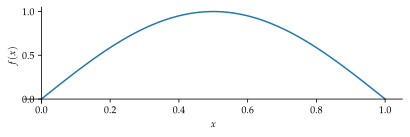

In [3]:
#| label: fig-formfunktion
#| fig-cap: "Frei gewählte Formfunktion"

plot_frei = sp.plot(Psi_x.subs(L,1),(x,0,1),size=(5.9,2))


#### Rayleigh - Quotient

Der Rayleigh-Quotient ist eine Energiebetrachtung. Er setzt die potentielle, maximale Energie $E_{pot,max}$ zur kinetischen, maximalen Energie $E_{kin,max}$ ins Verhältnis. Daraus lässt sich die Kreisfrequenz $\omega_n$ herauslösen. Die Lösung der Integrale wird hier mit einer Mathematik-Software durchgeführt. Die einzelnen Teilschritte werden nicht aufgeführt.
$$
E_{pot,max} = E_{kin,max}
$${#eq-rayleigh_balken_energie}

$$
\omega_1^2 = \frac{\int_0^L EI[u''(x)]^2 dx}{\int_0^L m_{const.}[u(x)]^2 dx}
$${#eq-rayleigh_balken_quotient}

Dies lässt sich mit entsprechender Formfunktion schreiben:

$$
\omega_1^2 = \frac{\int_0^L EI[\Psi''(x)]^2 dx}{\int_0^L m_{const.}[\Psi(x)]^2 dx}
$${#eq-rayleigh_balken_quotient_subs}

Durch die Ermittlung der zweiten Ableitung der Formfunktion:

In [4]:
Psi_x_diff_1 = sp.diff(Psi_x, x)
Psi_x_diff_2 = sp.diff(Psi_x, x,x)


render.eq_display('Psi(x)', Psi_x,
                  'Derivative(Psi(x),x)', Psi_x_diff_1,
                  'Derivative(Psi(x),x,x)', Psi_x_diff_2,)

          ⎛π⋅x⎞
Ψ(x) = sin⎜───⎟
          ⎝ L ⎠

                ⎛π⋅x⎞
           π⋅cos⎜───⎟
d               ⎝ L ⎠
──(Ψ(x)) = ──────────
dx             L     

              2    ⎛π⋅x⎞ 
  2         -π ⋅sin⎜───⎟ 
 d                 ⎝ L ⎠ 
───(Ψ(x)) = ─────────────
  2                2     
dx                L      

Diese eingesetzt in die @eq-rayleigh_balken_quotient_subs:

In [5]:
E, I, m_const = sp.symbols('E I m_const',real=True)
omega_1 = sp.sqrt(sp.integrate(E*I*sp.diff(Psi_x,x,2)**2, (x,0,L)) /sp.integrate(m_const*Psi_x**2, (x,0,L)) )


render.eq_display('omega_1', omega_1.doit())

            _________
      2    ╱   E⋅I   
     π ⋅  ╱  ─────── 
        ╲╱   m_const 
ω₁ = ────────────────
             2       
            L        

Dies entspricht der exakten Lösung @eq-rayleigh_balken_exakt! Grund dafür ist, dass die gewählte Formfunktion mit der dynamischen Deformation übereinstimmt.

### Formfunktion aus Biegelinie

Die Biegelinie für das System in @fig-rayleigh_balken_system ist folgend beschrieben. Beachte dabei dass die Deformation nach *"unten"* positiv definiert ist.
Die Funktion kann aus Hilfswerken entnommen werden.

In [6]:
a, b,F = sp.symbols('a b F')

b = L/2
a = b


zeta = x/L
beta = b/L
alpha = a/L

w_x_biegelinie_1 = (F*L**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)))/(E*I)
w_x_biegelinie_2 = sp.simplify((F*L**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)+(zeta-alpha)**3)))/(E*I)

w_x_biegelinie = sp.Piecewise((w_x_biegelinie_1,x<=a), (w_x_biegelinie_2,x>a))
render.eq_display('w(x)', w_x_biegelinie)



       ⎧               ⎛     2⎞                    
       ⎪           2   ⎜3   x ⎟                    
       ⎪        F⋅L ⋅x⋅⎜─ - ──⎟                    
       ⎪               ⎜4    2⎟                    
       ⎪               ⎝    L ⎠                   L
       ⎪        ───────────────           for x ≤ ─
w(x) = ⎨             12⋅E⋅I                       2
       ⎪                                           
       ⎪  ⎛  ⎛   2      2⎞            3⎞           
       ⎪F⋅⎝x⋅⎝3⋅L  - 4⋅x ⎠ - (L - 2⋅x) ⎠           
       ⎪────────────────────────────────  otherwise
       ⎪             48⋅E⋅I                        
       ⎩                                           

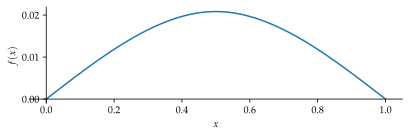

In [7]:
#| label: fig-formfunktion_biege
#| fig-cap: "Formfunktion aus Biegelinie abgeleitet"


plot_biege = sp.plot(w_x_biegelinie.subs([(L,1),(F,1),(E,1),(I,1)]), (x,0,1),size=(5.9,2))

#### Normierung
Es ist ersichtlich, dass die Formfunktion noch eine Normierung benötigt.
Dazu wird der Maximalwert zu $1$ gesetzt. Die Randbedingungen sind bereits erfüllt.

In [8]:
w_x_biegelinie_norm = w_x_biegelinie * w_x_biegelinie.subs(x,L/2)**-1

render.eq_display('w_norm(x)', w_x_biegelinie_norm)

                  ⎛⎧               ⎛     2⎞                    ⎞
                  ⎜⎪           2   ⎜3   x ⎟                    ⎟
                  ⎜⎪        F⋅L ⋅x⋅⎜─ - ──⎟                    ⎟
                  ⎜⎪               ⎜4    2⎟                    ⎟
                  ⎜⎪               ⎝    L ⎠                   L⎟
                  ⎜⎪        ───────────────           for x ≤ ─⎟
           48⋅E⋅I⋅⎜⎨             12⋅E⋅I                       2⎟
                  ⎜⎪                                           ⎟
                  ⎜⎪  ⎛  ⎛   2      2⎞            3⎞           ⎟
                  ⎜⎪F⋅⎝x⋅⎝3⋅L  - 4⋅x ⎠ - (L - 2⋅x) ⎠           ⎟
                  ⎜⎪────────────────────────────────  otherwise⎟
                  ⎜⎪             48⋅E⋅I                        ⎟
                  ⎝⎩                                           ⎠
wₙₒᵣₘ(x) = ─────────────────────────────────────────────────────
                                       3                        
                         

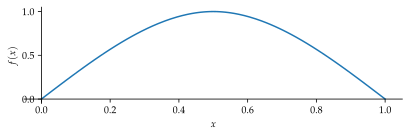

In [9]:
#| label: fig-formfunktion_biege_norm
#| fig-cap: "Normierte Formfunktion aus Biegelinie abgeleitet"


plot_norm_biege = sp.plot(w_x_biegelinie_norm.subs([(L,1),(F,1),(E,1),(I,1)]), (x,0,1),size=(5.9,2))


#### Rayleigh - Quotient

Durch das Einsetzen der bestimmten Formfunktion aus der Biegelinie in @eq-rayleigh_balken_quotient_subs kann die Eigenkreisfrequenz ermittelt werden.


In [10]:
omega_1_biege = sp.sqrt(sp.integrate(E*I*sp.diff(w_x_biegelinie_norm,x,2)**2, (x,0,L)) /sp.integrate(m_const*w_x_biegelinie_norm**2, (x,0,L)) )


render.eq_display('omega_1_biege', omega_1_biege.evalf(3))

                          0.5
                 ⎛  E⋅I  ⎞   
            9.94⋅⎜───────⎟   
                 ⎝m_const⎠   
ω_1_biege = ─────────────────
                     2       
                    L        

### Vergleich beider Lösungen

Ein Vergleich der Eigenkreisfrequenz aus der Biegeform mit der exakten Lösung aus @eq-rayleigh_balken_exakt zeigt eine minimale Abweichung.

In [11]:

render.eq_display(sp.Symbol('\\text{Abweichung}'), ((omega_1_biege / omega_1-1)*100).evalf(2)*unit.percent)

\text{Abweichung} = 0.72⋅percent

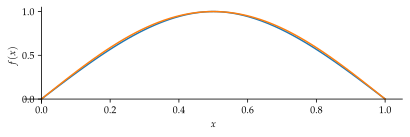

In [12]:
#| label: fig-formfunktion_vergleich
#| fig-cap: "Überlagerung beider Funktionen"

plot_vergleich = sp.plot(w_x_biegelinie_norm.subs([(L,1),(F,1),(E,1),(I,1)]),Psi_x.subs(L,1), (x,0,1),size=(5.9,2))


Um die minimale Abweichung offensichtlicher darzustellen ist in @fig-ausschnitt_formfunktion_vergleich ein Teilbereich dargestellt.

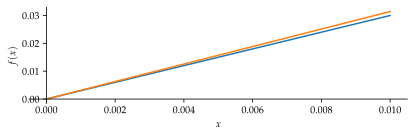

In [13]:
#| label: fig-ausschnitt_formfunktion_vergleich
#| fig-cap: "Ausschnitt der Überlagerung beider Funktionen"

plot_vergleich = sp.plot(w_x_biegelinie_norm.subs([(L,1),(F,1),(E,1),(I,1)]),Psi_x.subs(L,1), (x,0,0.01),size=(5.9,2))
